# Analysis


In this section, we'll conduct the three types of analyses - funding type, country analysis, and sector analysis.

# 1-Importing key Modules

In [7]:
# support both Python 2 and Python 3 with minimal overhead.
from __future__ import absolute_import, division, print_function
import warnings
warnings.filterwarnings('ignore')

In [8]:
import numpy as np
import pandas as pd 
#For Visuals
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
from matplotlib import rcParams
rcParams['figure.figsize'] = 11, 8
%config InlineBackend.figure_format = 'svg'
%matplotlib inline

# 2- Loading Data

In [9]:
df = pd.read_csv("master_data.csv", sep=",", encoding="ISO-8859-1")
df.head()

,Unnamed: 0,permalink,name,category_list,status,country_code,funding_round_permalink,funding_round_type,funded_at,raised_amount_usd
0,0,/organization/-fame,#fame,Media,operating,IND,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,05-01-2015,10000000.0
1,2,/organization/-qounter,:Qounter,Application Platforms|Real Time|Social Network...,operating,USA,/funding-round/b44fbb94153f6cdef13083530bb48030,seed,01-03-2014,700000.0
2,4,/organization/0-6-com,0-6.com,Curated Web,operating,CHN,/funding-round/5727accaeaa57461bd22a9bdd945382d,venture,19-03-2008,2000000.0
3,6,/organization/01games-technology,01Games Technology,Games,operating,HKG,/funding-round/7d53696f2b4f607a2f2a8cbb83d01839,undisclosed,01-07-2014,41250.0
4,7,/organization/0ndine-biomedical-inc,Ondine Biomedical Inc.,Biotechnology,operating,CAN,/funding-round/2b9d3ac293d5cdccbecff5c8cb0f327d,seed,11-09-2009,43360.0


Unnamed: 0 is index of old dataframe that was cleaned of missing values

In [10]:
df=df.drop(['Unnamed: 0'], axis=1) # this erases index error that might occur due to missing vales
df.head()

,permalink,name,category_list,status,country_code,funding_round_permalink,funding_round_type,funded_at,raised_amount_usd
0,/organization/-fame,#fame,Media,operating,IND,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,05-01-2015,10000000.0
1,/organization/-qounter,:Qounter,Application Platforms|Real Time|Social Network...,operating,USA,/funding-round/b44fbb94153f6cdef13083530bb48030,seed,01-03-2014,700000.0
2,/organization/0-6-com,0-6.com,Curated Web,operating,CHN,/funding-round/5727accaeaa57461bd22a9bdd945382d,venture,19-03-2008,2000000.0
3,/organization/01games-technology,01Games Technology,Games,operating,HKG,/funding-round/7d53696f2b4f607a2f2a8cbb83d01839,undisclosed,01-07-2014,41250.0
4,/organization/0ndine-biomedical-inc,Ondine Biomedical Inc.,Biotechnology,operating,CAN,/funding-round/2b9d3ac293d5cdccbecff5c8cb0f327d,seed,11-09-2009,43360.0


notice how  index is arranged in sequence and numbers

In [12]:
df.shape

(88529, 9)

# Taks 2: Funding Type Analysis

### Working with variable "funding_round_type"

In [13]:
df.funding_round_type.value_counts()

venture                  47809
seed                     21095
debt_financing            6506
angel                     4400
grant                     1939
private_equity            1820
undisclosed               1345
convertible_note          1320
equity_crowdfunding       1128
post_ipo_equity            598
product_crowdfunding       330
post_ipo_debt              151
non_equity_assistance       60
secondary_market            28
Name: funding_round_type, dtype: int64

#### Calculate the most representative value of the investment amount for each of the four funding types (venture, angel, seed, and private equity) and report the answers in the template provided on the previous page

In [14]:
# first, let's filter the df so it only contains the four specified funding types
df = df[(df.funding_round_type == "venture") | 
        (df.funding_round_type == "angel") | 
        (df.funding_round_type == "seed") | 
        (df.funding_round_type == "private_equity") ]

In [15]:
df.head()

,permalink,name,category_list,status,country_code,funding_round_permalink,funding_round_type,funded_at,raised_amount_usd
0,/organization/-fame,#fame,Media,operating,IND,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,05-01-2015,10000000.0
1,/organization/-qounter,:Qounter,Application Platforms|Real Time|Social Network...,operating,USA,/funding-round/b44fbb94153f6cdef13083530bb48030,seed,01-03-2014,700000.0
2,/organization/0-6-com,0-6.com,Curated Web,operating,CHN,/funding-round/5727accaeaa57461bd22a9bdd945382d,venture,19-03-2008,2000000.0
4,/organization/0ndine-biomedical-inc,Ondine Biomedical Inc.,Biotechnology,operating,CAN,/funding-round/2b9d3ac293d5cdccbecff5c8cb0f327d,seed,11-09-2009,43360.0
5,/organization/0ndine-biomedical-inc,Ondine Biomedical Inc.,Biotechnology,operating,CAN,/funding-round/954b9499724b946ad8c396a57a5f3b72,venture,21-12-2009,719491.0


In [16]:
df.funding_round_type.value_counts()

venture           47809
seed              21095
angel              4400
private_equity     1820
Name: funding_round_type, dtype: int64

In [17]:
df.funding_round_type.value_counts(normalize=True)

venture           0.636401
seed              0.280802
angel             0.058570
private_equity    0.024227
Name: funding_round_type, dtype: float64

### representative value of the funding amount

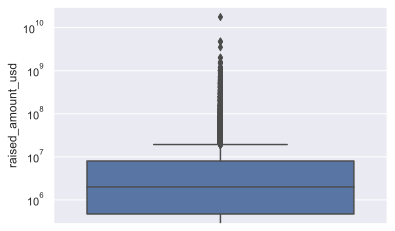

In [18]:
# distribution of raised_amount_usd
sns.boxplot(y=df['raised_amount_usd'])
plt.yscale('log')
plt.show()

In [19]:
# summary metrics
df['raised_amount_usd'].describe()

count    7.512400e+04
mean     9.519475e+06
std      7.792778e+07
min      0.000000e+00
25%      4.705852e+05
50%      2.000000e+06
75%      8.000000e+06
max      1.760000e+10
Name: raised_amount_usd, dtype: float64

Note that there's a significant difference between the mean and the median(50% point) - USD 9.5m and USD 2m. Let's also compare the summary stats across the four categories.

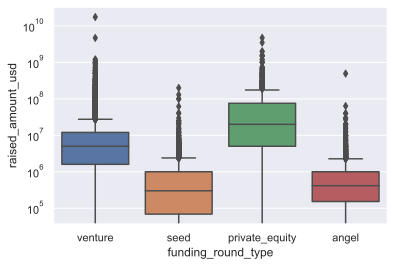

In [20]:
# comparing summary stats across four categories
sns.boxplot(x='funding_round_type', y='raised_amount_usd', data=df)
plt.yscale('log')
plt.show()

##### compare the mean and median values across categories

In [21]:
# For median
df.pivot_table(values='raised_amount_usd', columns='funding_round_type', aggfunc=[np.median])

median                                    
funding_round_type     angel private_equity      seed    venture
raised_amount_usd   414906.0     20000000.0  300000.0  5000000.0

In [22]:
# mean  across categories
df.pivot_table(values='raised_amount_usd', columns='funding_round_type', aggfunc=[np.mean])

mean                                            
funding_round_type          angel private_equity           seed       venture
raised_amount_usd   971573.891136   7.393849e+07  747793.682484  1.172422e+07

In [23]:
# compare the mean and median values across categories
df.pivot_table(values='raised_amount_usd', columns='funding_round_type', aggfunc=[np.median, np.mean])

median                                      \
funding_round_type     angel private_equity      seed    venture   
raised_amount_usd   414906.0     20000000.0  300000.0  5000000.0   

                             mean                                              
funding_round_type          angel private_equity           seed       venture  
raised_amount_usd   971573.891136   7.393849e+07  747793.682484  1.172422e+07

Note that there's a large difference between the mean and the median values for all four types. For type "private equity", for e.g. the median is about 20m while the mean is about 70m.

Thus, the choice of the summary statistic will drastically affect the decision (of the investment type). Let's choose median, since there are quite a few extreme values pulling the mean up towards them - but they are not the most 'representative' values.

##### compare the median investment amount across the types

In [24]:
df.groupby('funding_round_type')['raised_amount_usd'].median().sort_values(ascending=False)

funding_round_type
private_equity    20000000.0
venture            5000000.0
angel               414906.0
seed                300000.0
Name: raised_amount_usd, dtype: float64

- The median investment amount for type 'private_equity' is approx. USD 20m, which is beyond Teclov' range of 5-15m. 
- The median of 'venture' type is about USD 5m, which is suitable for them. 
- The average amounts of angel and seed types are lower than their range.

- **Thus, 'venture' type investment will be most suited to them.**

# Task 3: Country Analysis

1. Teclov wants to see the top nine countries which have received the highest total funding (across ALL sectors for the chosen investment type)
2. For the chosen investment type, make a data frame named top9 with the top nine countries (based on the total investment amount each country has received

##### step1: filter the df for private equity type investments

In [39]:
df = df[df.funding_round_type=="venture"]
df.shape

(47809, 9)

In [40]:
df.head(2)

,permalink,name,category_list,status,country_code,funding_round_permalink,funding_round_type,funded_at,raised_amount_usd
0,/organization/-fame,#fame,Media,operating,IND,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,05-01-2015,10000000.0
2,/organization/0-6-com,0-6.com,Curated Web,operating,CHN,/funding-round/5727accaeaa57461bd22a9bdd945382d,venture,19-03-2008,2000000.0


In [41]:
df.country_code.value_counts()[:9]

USA    35943
GBR     2041
CHN     1548
CAN     1246
FRA      912
IND      819
ISR      786
DEU      554
ESP      316
Name: country_code, dtype: int64

**Identify the top three English-speaking countries in the data frame top9**

In [34]:
len(df[df.country_code == 'CAN'])

2193

In [29]:
len(df[df.country_code == 'USA'])

51585

In [36]:
len(df[df.country_code == 'GBR'])

4049

##### step 2: check countries w.r.t total funding amounts in venture type

In [44]:
country_wise_total = df.groupby('country_code')['raised_amount_usd'].sum().sort_values(ascending=False)
top_countries=pd.DataFrame(country_wise_total)
top_countries

,raised_amount_usd
country_code,
USA,4.200680e+11
CHN,3.933892e+10
GBR,2.007281e+10
IND,1.426151e+10
CAN,9.482218e+09
...,...
MCO,6.570000e+05
SAU,5.000000e+05
CMR,3.595610e+05


##### Top nine countries

In [45]:
top_countries.head(9)

,raised_amount_usd
country_code,
USA,4.200680e+11
CHN,3.933892e+10
GBR,2.007281e+10
IND,1.426151e+10
CAN,9.482218e+09
FRA,7.226851e+09
ISR,6.854350e+09
DEU,6.306922e+09
JPN,3.167647e+09


Among the top 9 countries, USA, GBR and CAN are the top three English speaking countries. Let's filter the dataframe so it contains only the top 3 countries.

In [46]:
# filtering for the top three countries
df = df[(df.country_code=='USA') | (df.country_code=='GBR') | (df.country_code=='CAN')]
df.shape

(39230, 9)

Notice how we are using fliters to shorten our dataframe. Now , we have top three countries of type investment

In [47]:
df.country_code.value_counts()

USA    35943
GBR     2041
CAN     1246
Name: country_code, dtype: int64

##### distribution and the total values of funding amount among top countries

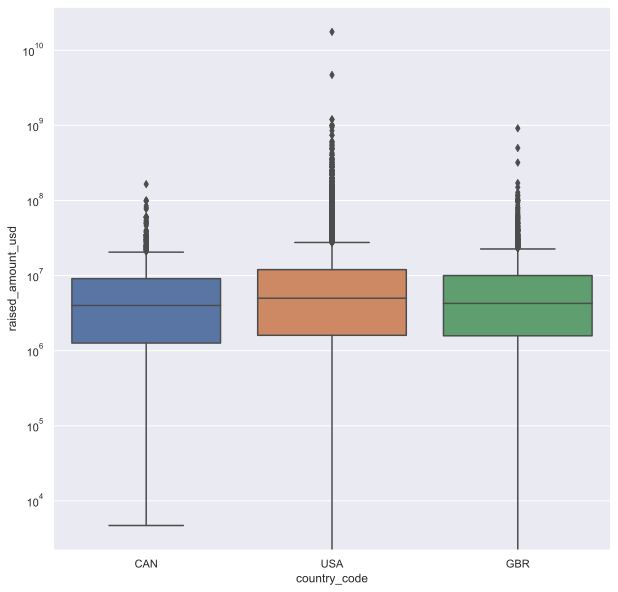

In [48]:
# boxplot to see distributions of funding amount across countries
plt.figure(figsize=(10, 10))
sns.boxplot(x='country_code', y='raised_amount_usd', data=df)
plt.yscale('log')
plt.show()

# Task 4: Sector Analysis

- 1. Extract the primary sector of each category list from the category_list
column
- 2. Use the mapping file 'mapping.csv' to map each primary sector to one of the
eight main sectors (Note that ‘Others’ is also considered one of the main
sectors)

In [58]:
df.category_list.nunique()

7881

In [57]:
df.category_list.value_counts()[:8]

Biotechnology          4781
Software               3328
Health Care            1235
Clean Technology       1081
Enterprise Software    1045
Hardware + Software     932
Mobile                  879
Semiconductors          708
Name: category_list, dtype: int64

In [56]:
df.head()

,permalink,name,category_list,status,country_code,funding_round_permalink,funding_round_type,funded_at,raised_amount_usd
5,/organization/0ndine-biomedical-inc,Ondine Biomedical Inc.,Biotechnology,operating,CAN,/funding-round/954b9499724b946ad8c396a57a5f3b72,venture,21-12-2009,719491.0
7,/organization/0xdata,H2O.ai,Analytics,operating,USA,/funding-round/3bb2ee4a2d89251a10aaa735b1180e44,venture,09-11-2015,20000000.0
8,/organization/0xdata,H2O.ai,Analytics,operating,USA,/funding-round/ae2a174c06517c2394aed45006322a7e,venture,03-01-2013,1700000.0
9,/organization/0xdata,H2O.ai,Analytics,operating,USA,/funding-round/e1cfcbe1bdf4c70277c5f29a3482f24e,venture,19-07-2014,8900000.0
15,/organization/1-mainstream,1 Mainstream,Apps|Cable|Distribution|Software,acquired,USA,/funding-round/b952cbaf401f310927430c97b68162ea,venture,17-03-2015,5000000.0


just check index 15, where we have Apps|Cable|Distribution|Software. We need to use main category out of it. For example if , Biotechnology occurs more than 4781 times then we need to separate it from other categories mixed within that category.

### extracting the main category

In [61]:
df.loc[:, 'main_category'] = df['category_list'].apply(lambda x: x.split("|")[0]) # keeping 1st entity
df = df.drop('category_list', axis=1)
df.head()

,permalink,name,status,country_code,funding_round_permalink,funding_round_type,funded_at,raised_amount_usd,main_category
5,/organization/0ndine-biomedical-inc,Ondine Biomedical Inc.,operating,CAN,/funding-round/954b9499724b946ad8c396a57a5f3b72,venture,21-12-2009,719491.0,Biotechnology
7,/organization/0xdata,H2O.ai,operating,USA,/funding-round/3bb2ee4a2d89251a10aaa735b1180e44,venture,09-11-2015,20000000.0,Analytics
8,/organization/0xdata,H2O.ai,operating,USA,/funding-round/ae2a174c06517c2394aed45006322a7e,venture,03-01-2013,1700000.0,Analytics
9,/organization/0xdata,H2O.ai,operating,USA,/funding-round/e1cfcbe1bdf4c70277c5f29a3482f24e,venture,19-07-2014,8900000.0,Analytics
15,/organization/1-mainstream,1 Mainstream,acquired,USA,/funding-round/b952cbaf401f310927430c97b68162ea,venture,17-03-2015,5000000.0,Apps


In [62]:
df.main_category.value_counts()[:8]

Biotechnology          6047
Software               3440
Advertising            1877
Enterprise Software    1605
Health Care            1603
Analytics              1350
Clean Technology       1335
Mobile                 1282
Name: main_category, dtype: int64

From 4781 to 6047. We have removed some noise and separated these entities

In [63]:
df.head(8)

,permalink,name,status,country_code,funding_round_permalink,funding_round_type,funded_at,raised_amount_usd,main_category
5,/organization/0ndine-biomedical-inc,Ondine Biomedical Inc.,operating,CAN,/funding-round/954b9499724b946ad8c396a57a5f3b72,venture,21-12-2009,719491.0,Biotechnology
7,/organization/0xdata,H2O.ai,operating,USA,/funding-round/3bb2ee4a2d89251a10aaa735b1180e44,venture,09-11-2015,20000000.0,Analytics
8,/organization/0xdata,H2O.ai,operating,USA,/funding-round/ae2a174c06517c2394aed45006322a7e,venture,03-01-2013,1700000.0,Analytics
9,/organization/0xdata,H2O.ai,operating,USA,/funding-round/e1cfcbe1bdf4c70277c5f29a3482f24e,venture,19-07-2014,8900000.0,Analytics
15,/organization/1-mainstream,1 Mainstream,acquired,USA,/funding-round/b952cbaf401f310927430c97b68162ea,venture,17-03-2015,5000000.0,Apps
21,/organization/10-minutes-with,10 Minutes With,operating,GBR,/funding-round/0faccbbcc5818dc5326469f13f5a8ac8,venture,09-10-2014,4000000.0,Education
25,/organization/1000memories,1000memories,acquired,USA,/funding-round/502bd0e50c27616995e4bdad24605ef8,venture,16-02-2011,2520000.0,Curated Web
29,/organization/1000museums-com,1000museums.com,operating,USA,/funding-round/13be128d655076a025221d7fddc90d68,venture,14-10-2009,265940.0,Curated Web


In [64]:
# read mapping file
mapping = pd.read_csv("mapping.csv", sep=",")
mapping.head()

,category_list,Automotive & Sports,Blanks,Cleantech / Semiconductors,Entertainment,Health,Manufacturing,"News, Search and Messaging",Others,"Social, Finance, Analytics, Advertising"
0,NaN,0,1,0,0,0,0,0,0,0
1,3D,0,0,0,0,0,1,0,0,0
2,3D Printing,0,0,0,0,0,1,0,0,0
3,3D Technology,0,0,0,0,0,1,0,0,0
4,Accounting,0,0,0,0,0,0,0,0,1


In [66]:
mapping.shape

(688, 10)

In [65]:
mapping.isnull().sum()

category_list                              1
Automotive & Sports                        0
Blanks                                     0
Cleantech / Semiconductors                 0
Entertainment                              0
Health                                     0
Manufacturing                              0
News, Search and Messaging                 0
Others                                     0
Social, Finance, Analytics, Advertising    0
dtype: int64

In [67]:
# remove the row with missing values
mapping = mapping[~pd.isnull(mapping['category_list'])]
mapping.isnull().sum()

category_list                              0
Automotive & Sports                        0
Blanks                                     0
Cleantech / Semiconductors                 0
Entertainment                              0
Health                                     0
Manufacturing                              0
News, Search and Messaging                 0
Others                                     0
Social, Finance, Analytics, Advertising    0
dtype: int64

Now, since we need to merge the mapping file with the main dataframe (df), let's convert the common column to lowercase in both

In [68]:
mapping['category_list'] = mapping['category_list'].str.lower()
df['main_category'] = df['main_category'].str.lower()

To be able to merge all the ```main_category``` values with the mapping file's ```category_list``` column, all the values in the  ```main_category``` column should be present in the ```category_list``` column of the mapping file.

##### sanity check

In [69]:
# values in main_category column in df which are not in the category_list column in mapping file
df[~df['main_category'].isin(mapping['category_list'])]

,permalink,name,status,country_code,funding_round_permalink,funding_round_type,funded_at,raised_amount_usd,main_category
7,/organization/0xdata,H2O.ai,operating,USA,/funding-round/3bb2ee4a2d89251a10aaa735b1180e44,venture,09-11-2015,20000000.0,analytics
8,/organization/0xdata,H2O.ai,operating,USA,/funding-round/ae2a174c06517c2394aed45006322a7e,venture,03-01-2013,1700000.0,analytics
9,/organization/0xdata,H2O.ai,operating,USA,/funding-round/e1cfcbe1bdf4c70277c5f29a3482f24e,venture,19-07-2014,8900000.0,analytics
47,/organization/100plus,100Plus,acquired,USA,/funding-round/b5facb0d9dea2f0352b5834892c88c53,venture,02-11-2011,500000.0,analytics
136,/organization/1world-online,1World Online,operating,USA,/funding-round/32936e588a134502712877150198a0b3,venture,13-08-2015,2500000.0,analytics
...,...,...,...,...,...,...,...,...,...
88270,/organization/zoopla,Zoopla,ipo,GBR,/funding-round/98da1f441a55c9a9629a256828923e38,venture,19-01-2009,5440000.0,property management
88291,/organization/zopa,Zopa,operating,GBR,/funding-round/2a55d435c3433d8f903526c050c19361,venture,20-03-2007,12900000.0,finance
88292,/organization/zopa,Zopa,operating,GBR,/funding-round/4b0740cb83da8d2af9d221e5455f8923,venture,01-03-2006,15000000.0,finance
88293,/organization/zopa,Zopa,operating,GBR,/funding-round/54dbfbd899caf7d1d4b2b7676065f303,venture,01-07-2006,5000000.0,finance


Notice that values such as 'analytics', 'business analytics', 'finance', 'nanatechnology' etc. are not present in the mapping file.

Let's have a look at the values which are present in the mapping file but not in the main dataframe df.

In [70]:
# values in the category_list column which are not in main_category column 
mapping[~mapping['category_list'].isin(df['main_category'])]

,category_list,Automotive & Sports,Blanks,Cleantech / Semiconductors,Entertainment,Health,Manufacturing,"News, Search and Messaging",Others,"Social, Finance, Analytics, Advertising"
16,air pollution control,0,0,1,0,0,0,0,0,0
20,alter0tive medicine,0,0,0,0,1,0,0,0,0
22,a0lytics,0,0,0,0,0,0,0,0,1
33,aquaculture,0,0,1,0,0,0,0,0,0
49,b2b express delivery,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...
672,waste ma0gement,0,0,1,0,0,0,0,0,0
675,water purification,0,0,1,0,0,0,0,0,0
682,weddings,0,0,0,1,0,0,0,0,0
683,wholesale,0,0,0,0,0,0,0,1,0


If you see carefully, you'll notice something fishy - there are sectors named alter0tive medicine, a0lytics, waste ma0gement, veteri0ry, etc. This is not a random quality issue, but rather a pattern. In some strings, the 'na' has been replaced by '0'. This is weird - maybe someone was trying to replace the 'NA' values with '0', and ended up doing this.

Let's treat this problem by replacing '0' with 'na' in the category_list column.

In [71]:
# replacing '0' with 'na'
mapping['category_list'] = mapping['category_list'].apply(lambda x: x.replace('0', 'na'))
print(mapping['category_list'][:9])

1                    3d
2           3d printing
3         3d technology
4            accounting
5      active lifestyle
6          ad targeting
7    advanced materials
8      adventure travel
9           advertising
Name: category_list, dtype: object


In [72]:
# values in the category_list column which are not in main_category column 
mapping[~mapping['category_list'].isin(df['main_category'])]

,category_list,Automotive & Sports,Blanks,Cleantech / Semiconductors,Entertainment,Health,Manufacturing,"News, Search and Messaging",Others,"Social, Finance, Analytics, Advertising"
16,air pollution control,0,0,1,0,0,0,0,0,0
33,aquaculture,0,0,1,0,0,0,0,0,0
49,b2b express delivery,0,0,0,0,0,0,0,0,1
64,biomass power generation,0,0,1,0,0,0,0,0,0
69,boating industry,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...
670,virtual workforces,0,0,0,1,0,0,0,0,0
675,water purification,0,0,1,0,0,0,0,0,0
682,weddings,0,0,0,1,0,0,0,0,0
683,wholesale,0,0,0,0,0,0,0,1,0


### Merging two dataframes

In [73]:
# merge the dfs
df = pd.merge(df, mapping, how='inner', left_on='main_category', right_on='category_list')
df.head()

,permalink,name,status,country_code,funding_round_permalink,funding_round_type,funded_at,raised_amount_usd,main_category,category_list,Automotive & Sports,Blanks,Cleantech / Semiconductors,Entertainment,Health,Manufacturing,"News, Search and Messaging",Others,"Social, Finance, Analytics, Advertising"
0,/organization/0ndine-biomedical-inc,Ondine Biomedical Inc.,operating,CAN,/funding-round/954b9499724b946ad8c396a57a5f3b72,venture,21-12-2009,719491.0,biotechnology,biotechnology,0,0,1,0,0,0,0,0,0
1,/organization/10x-genomics,10X Genomics,operating,USA,/funding-round/563923487783bdeb5d0b7872f3d6b99a,venture,12-01-2015,55000000.0,biotechnology,biotechnology,0,0,1,0,0,0,0,0,0
2,/organization/10x-technologies,10X Technologies,operating,USA,/funding-round/39c1441d5098875a925577d0f2ad3904,venture,12-01-2015,550000.0,biotechnology,biotechnology,0,0,1,0,0,0,0,0,0
3,/organization/20-20-gene-systems-inc,20/20 Gene Systems Inc.,operating,USA,/funding-round/1df118940a2af3f77ec91a53c2c2ca79,venture,23-09-2015,2037014.0,biotechnology,biotechnology,0,0,1,0,0,0,0,0,0
4,/organization/20-20-gene-systems-inc,20/20 Gene Systems Inc.,operating,USA,/funding-round/63f491aa5ca433cdd7e7e75b208b2fab,venture,25-09-2012,150000.0,biotechnology,biotechnology,0,0,1,0,0,0,0,0,0


In [74]:
# let's drop the category_list column since it is the same as main_category
df = df.drop('category_list', axis=1)
df.head()

,permalink,name,status,country_code,funding_round_permalink,funding_round_type,funded_at,raised_amount_usd,main_category,Automotive & Sports,Blanks,Cleantech / Semiconductors,Entertainment,Health,Manufacturing,"News, Search and Messaging",Others,"Social, Finance, Analytics, Advertising"
0,/organization/0ndine-biomedical-inc,Ondine Biomedical Inc.,operating,CAN,/funding-round/954b9499724b946ad8c396a57a5f3b72,venture,21-12-2009,719491.0,biotechnology,0,0,1,0,0,0,0,0,0
1,/organization/10x-genomics,10X Genomics,operating,USA,/funding-round/563923487783bdeb5d0b7872f3d6b99a,venture,12-01-2015,55000000.0,biotechnology,0,0,1,0,0,0,0,0,0
2,/organization/10x-technologies,10X Technologies,operating,USA,/funding-round/39c1441d5098875a925577d0f2ad3904,venture,12-01-2015,550000.0,biotechnology,0,0,1,0,0,0,0,0,0
3,/organization/20-20-gene-systems-inc,20/20 Gene Systems Inc.,operating,USA,/funding-round/1df118940a2af3f77ec91a53c2c2ca79,venture,23-09-2015,2037014.0,biotechnology,0,0,1,0,0,0,0,0,0
4,/organization/20-20-gene-systems-inc,20/20 Gene Systems Inc.,operating,USA,/funding-round/63f491aa5ca433cdd7e7e75b208b2fab,venture,25-09-2012,150000.0,biotechnology,0,0,1,0,0,0,0,0,0


### Converting the 'wide' dataframe to 'long'
You'll notice that the columns representing the main category in the mapping file are originally in the 'wide' format - Automotive & Sports, Cleantech / Semiconductors etc.

They contain the value '1' if the company belongs to that category, else 0. This is quite redundant. We can as well have a column named 'sub-category' having these values.

Let's convert the df into the long format from the current wide format. First, we'll store the 'value variables' (those which are to be melted) in an array. The rest will then be the 'index variables'.

In [76]:
# check columns that are of 0,1 values for categories
df.columns[9:18]

Index(['Automotive & Sports', 'Blanks', 'Cleantech / Semiconductors',
       'Entertainment', 'Health', 'Manufacturing',
       'News, Search and Messaging', 'Others',
       'Social, Finance, Analytics, Advertising'],
      dtype='object')

##### store the value variables in one Series

In [77]:
value_vars = df.columns[9:18]

##### take the setdiff() to get the rest of the variables

In [79]:
id_vars = np.setdiff1d(df.columns, value_vars)
id_vars

array(['country_code', 'funded_at', 'funding_round_permalink',
       'funding_round_type', 'main_category', 'name', 'permalink',
       'raised_amount_usd', 'status'], dtype=object)

In [80]:
# convert into long
long_df = pd.melt(df, 
        id_vars=list(id_vars), 
        value_vars=list(value_vars))

long_df.head()

,country_code,funded_at,funding_round_permalink,funding_round_type,main_category,name,permalink,raised_amount_usd,status,variable,value
0,CAN,21-12-2009,/funding-round/954b9499724b946ad8c396a57a5f3b72,venture,biotechnology,Ondine Biomedical Inc.,/organization/0ndine-biomedical-inc,719491.0,operating,Automotive & Sports,0
1,USA,12-01-2015,/funding-round/563923487783bdeb5d0b7872f3d6b99a,venture,biotechnology,10X Genomics,/organization/10x-genomics,55000000.0,operating,Automotive & Sports,0
2,USA,12-01-2015,/funding-round/39c1441d5098875a925577d0f2ad3904,venture,biotechnology,10X Technologies,/organization/10x-technologies,550000.0,operating,Automotive & Sports,0
3,USA,23-09-2015,/funding-round/1df118940a2af3f77ec91a53c2c2ca79,venture,biotechnology,20/20 Gene Systems Inc.,/organization/20-20-gene-systems-inc,2037014.0,operating,Automotive & Sports,0
4,USA,25-09-2012,/funding-round/63f491aa5ca433cdd7e7e75b208b2fab,venture,biotechnology,20/20 Gene Systems Inc.,/organization/20-20-gene-systems-inc,150000.0,operating,Automotive & Sports,0


In [81]:
long_df.variable.value_counts()

Cleantech / Semiconductors                 39215
Blanks                                     39215
Manufacturing                              39215
Others                                     39215
News, Search and Messaging                 39215
Social, Finance, Analytics, Advertising    39215
Entertainment                              39215
Health                                     39215
Automotive & Sports                        39215
Name: variable, dtype: int64

In [86]:
long_df.shape

(39215, 10)

We can now get rid of the rows where the column 'value' is 0

In [82]:
long_df = long_df[long_df['value']==1]
long_df.head()

,country_code,funded_at,funding_round_permalink,funding_round_type,main_category,name,permalink,raised_amount_usd,status,variable,value
26110,USA,05-11-2012,/funding-round/2785595770e91ab8fd4854ef125ec563,venture,drones,3D Robotics,/organization/3d-robotics,5000000.0,operating,Automotive & Sports,1
26111,USA,23-04-2015,/funding-round/7ca0d4dc119b6d65eebfb352c3544542,venture,drones,3D Robotics,/organization/3d-robotics,14000000.0,operating,Automotive & Sports,1
26112,USA,12-09-2013,/funding-round/d6221c11246b0a536ee2cadd9fcf54d3,venture,drones,3D Robotics,/organization/3d-robotics,30000000.0,operating,Automotive & Sports,1
26113,USA,25-02-2015,/funding-round/ff3c1d1ae1c3486d775095b093d99b58,venture,drones,3D Robotics,/organization/3d-robotics,50000000.0,operating,Automotive & Sports,1
26114,USA,13-10-2015,/funding-round/156e4fbce54aca39a8be9a1a2fa1fb77,venture,drones,Cape Productions,/organization/cape-productions,10000000.0,operating,Automotive & Sports,1


remove that column with value '0' altogether

In [83]:
long_df = long_df.drop('value', axis=1)
long_df.head()

,country_code,funded_at,funding_round_permalink,funding_round_type,main_category,name,permalink,raised_amount_usd,status,variable
26110,USA,05-11-2012,/funding-round/2785595770e91ab8fd4854ef125ec563,venture,drones,3D Robotics,/organization/3d-robotics,5000000.0,operating,Automotive & Sports
26111,USA,23-04-2015,/funding-round/7ca0d4dc119b6d65eebfb352c3544542,venture,drones,3D Robotics,/organization/3d-robotics,14000000.0,operating,Automotive & Sports
26112,USA,12-09-2013,/funding-round/d6221c11246b0a536ee2cadd9fcf54d3,venture,drones,3D Robotics,/organization/3d-robotics,30000000.0,operating,Automotive & Sports
26113,USA,25-02-2015,/funding-round/ff3c1d1ae1c3486d775095b093d99b58,venture,drones,3D Robotics,/organization/3d-robotics,50000000.0,operating,Automotive & Sports
26114,USA,13-10-2015,/funding-round/156e4fbce54aca39a8be9a1a2fa1fb77,venture,drones,Cape Productions,/organization/cape-productions,10000000.0,operating,Automotive & Sports


In [85]:
long_df.shape

(39215, 10)

In [87]:
# renaming the 'variable' column
long_df = long_df.rename(columns={'variable': 'sector'})

The dataframe now contains only venture type investments in countries USA, IND and GBR, and we have mapped each company to one of the eight main sectors (named 'sector' in the dataframe). 

We can now compute the **sector-wise number** and the **amount of investment in the three countries**.

In [88]:
# summarising the sector-wise number and sum of venture investments across three countries

# first, let's also filter for investment range between 5 and 15m
df = long_df[(long_df['raised_amount_usd'] >= 5000000) & (long_df['raised_amount_usd'] <= 15000000)]

In [89]:
# groupby country, sector and compute the count and sum
df.groupby(['country_code', 'sector']).raised_amount_usd.agg(['count', 'sum'])

count           sum
country_code sector                                                      
CAN          Automotive & Sports                          2  1.500000e+07
             Cleantech / Semiconductors                 112  1.015888e+09
             Entertainment                               23  1.600221e+08
             Health                                      21  1.683451e+08
             Manufacturing                               31  2.376331e+08
             News, Search and Messaging                  46  4.201211e+08
             Others                                     109  9.261380e+08
             Social, Finance, Analytics, Advertising     78  6.561431e+08
GBR          Automotive & Sports                         16  1.670516e+08
             Cleantech / Semiconductors                 130  1.163990e+09
             Entertainment                               56  4.827847e+08
             Health                                      24  2.145375e+08
             Manufacturing                               42  3.619403e+08
             News, Search and Messaging                  73  6.157462e+08
             Others                                     147  1.283624e+09
             Social, Finance, Analytics, Advertising    133  1.089404e+09
USA          Automotive & Sports                        167  1.454104e+09
             Cleantech / Semiconductors                2350  2.163343e+10
             Entertainment                              591  5.099198e+09
             Health                                     909  8.211859e+09
             Manufacturing                              799  7.258553e+09
             News, Search and Messaging                1583  1.397157e+10
             Others                                    2950  2.632101e+10
             Social, Finance, Analytics, Advertising   2714  2.380738e+10

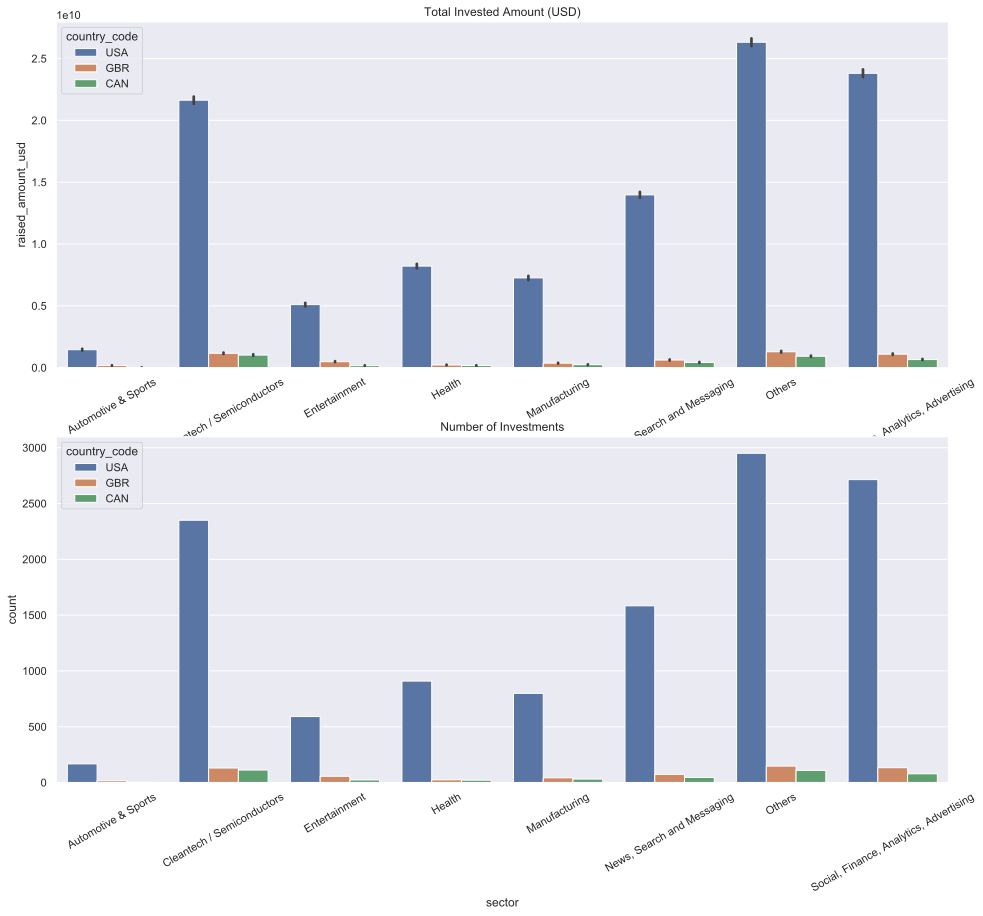

In [90]:
# plotting sector-wise count and sum of investments in the three countries
plt.figure(figsize=(16, 14))

plt.subplot(2, 1, 1)
p = sns.barplot(x='sector', y='raised_amount_usd', hue='country_code', data=df, estimator=np.sum)
p.set_xticklabels(p.get_xticklabels(),rotation=30)
plt.title('Total Invested Amount (USD)')

plt.subplot(2, 1, 2)
q = sns.countplot(x='sector', hue='country_code', data=df)
q.set_xticklabels(q.get_xticklabels(),rotation=30)
plt.title('Number of Investments')


plt.show()

hus, the top country in terms of the number of investments (and the total amount invested) is the USA. The sectors 'Others', 'Social, Finance, Analytics and Advertising' and 'Cleantech/Semiconductors' are the most heavily invested ones.

In case you don't want to consider 'Others' as a sector, 'News, Search and Messaging' is the next best sector.

### END of Assignment